# Deep Learning with TensorFlow/Keras

Now that we have completed a project of Machine Learning with spark ML, in this assignment, we will be swithing to the context of Deep Learning with Tensorflow/Keras by two tasks:
- Task1: Image Classification with CNN
- Task2: Image captioning with a combination of CNN and RNN

## Task 1: Going Deeper with convolutions


Before **Inception v1** (**GoogLeNet**), which is the winner of the **ILSVRC** (ImageNet Large Scale Visual Recognition Competition) in 2014, most popular CNNs just stacked convolution layers deeper and deeper, hoping to get better performance.

The Inception network, however, uses a lot of tricks to improve performance in terms of speed and accuracy.
Compared to other networks, **Inception v1** has significant improvement over **ZFNet** (the winner in 2013) and **AlexNet** (the winner in 2012), and has relatively lower error rate compared with the VGGNet.

In this task, we will be implementing the inception architecture [in this paper](https://arxiv.org/abs/1409.4842) with TensorFlow/Keras. 

The goal of this task is to understand how to write code to build the model, as long as you can verify the correctness of the code (e.g., through Keras model summary), it is not necessary to train the model.

In [1]:
import tensorflow
print(tensorflow.__version__)
from tensorflow.keras import Model, layers, utils
from tensorflow.nn import local_response_normalization

1.15.0


In [2]:
input_layer = layers.Input(shape=(224, 224, 3))

intro_conv0_7x7 = layers.Conv2D(64, (7, 7), strides=(2, 2), padding="same", activation="relu")(input_layer)
intro_pool0 = layers.MaxPool2D(pool_size=(3,3), strides=(2, 2), padding="same")(intro_conv0_7x7)
intro_norm0 = layers.Lambda(local_response_normalization)(intro_pool0)

intro_conv1_1x1 = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(intro_norm0)
intro_conv1_3x3 = layers.Conv2D(192, (3, 3), padding="same", activation="relu")(intro_conv1_1x1)
intro_pool1_3x3 = layers.MaxPool2D(pool_size=(3,3), strides=(2, 2), padding="same")(intro_conv1_3x3)
intro_norm1 = layers.Lambda(local_response_normalization)(intro_pool1_3x3)

# inception3a module
conv0_1x1 = layers.Conv2D(64, kernel_size=(1, 1), padding='same', activation='relu', name='inception3a_conv0_1x1')(intro_norm1)
conv1_1x1 = layers.Conv2D(96, kernel_size=(1, 1), padding='same', activation='relu', name='inception3a_conv1_1x1')(intro_norm1)
conv1_3x3 = layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', name='inception3a_conv1_3x3')(conv1_1x1)
conv2_1x1 = layers.Conv2D(16, kernel_size=(1, 1), padding='same', activation='relu', name='inception3a_conv2_1x1')(intro_norm1)
conv2_5x5 = layers.Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', name='inception3a_conv2_5x5')(conv2_1x1)
pool3_3x3 = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same', name='inception3a_pool3_3x3')(intro_norm1)
conv3_1x1 = layers.Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', name='inception3a_conv3_1x1')(pool3_3x3)
inception3a = layers.Concatenate(name='inception3a')([conv0_1x1, conv1_3x3, conv2_5x5, conv3_1x1])

# inception3b module
inception3b_conv0_1x1 = layers.Conv2D(128, kernel_size=(1, 1), padding='same', activation='relu', name='inception3b_conv0_1x1')(inception3a)
inception3b_conv1_1x1 = layers.Conv2D(128, kernel_size=(1, 1), padding='same', activation='relu', name='inception3b_conv1_1x1')(inception3a)
inception3b_conv1_3x3 = layers.Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu', name='inception3b_conv1_3x3')(inception3b_conv1_1x1)
inception3b_conv2_1x1 = layers.Conv2D(32, kernel_size=(1, 1), padding='same', activation='relu', name='inception3b_conv2_1x1')(inception3a)
inception3b_conv2_5x5 = layers.Conv2D(96, kernel_size=(5, 5), padding='same', activation='relu', name='inception3b_conv2_5x5')(inception3b_conv2_1x1)
inception3b_pool3_3x3 = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same', name='inception3b_pool3_3x3')(inception3a)
inception3b_conv3_1x1 = layers.Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='inception3b_conv3_1x1')(inception3b_pool3_3x3)
inception3b = layers.Concatenate(name='inception3b')([inception3b_conv0_1x1, inception3b_conv1_3x3, inception3b_conv2_5x5, inception3b_conv3_1x1])


pool4a = layers.MaxPool2D(pool_size=(3,3), strides=(2, 2), padding="same")(inception3b)
# inception4a module
inception4a_conv0_1x1 = layers.Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu', name='inception4a_conv0_1x1')(pool4a)
inception4a_conv1_1x1 = layers.Conv2D(96, kernel_size=(1, 1), padding='same', activation='relu', name='inception4a_conv1_1x1')(pool4a)
inception4a_conv1_3x3 = layers.Conv2D(208, kernel_size=(3, 3), padding='same', activation='relu', name='inception4a_conv1_3x3')(inception4a_conv1_1x1)
inception4a_conv2_1x1 = layers.Conv2D(16, kernel_size=(1, 1), padding='same', activation='relu', name='inception4a_conv2_1x1')(pool4a)
inception4a_conv2_5x5 = layers.Conv2D(48, kernel_size=(5, 5), padding='same', activation='relu', name='inception4a_conv2_5x5')(inception4a_conv2_1x1)
inception4a_pool3_3x3 = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same', name='inception4a_pool3_3x3')(pool4a)
inception4a_conv3_1x1 = layers.Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='inception4a_conv3_1x1')(inception4a_pool3_3x3)
inception4a = layers.Concatenate(name='inception4a')([inception4a_conv0_1x1, inception4a_conv1_3x3, inception4a_conv2_5x5, inception4a_conv3_1x1])

# inception4b module
inception4b_conv0_1x1 = layers.Conv2D(160, kernel_size=(1, 1), padding='same', activation='relu', name='inception4b_conv0_1x1')(inception4a)
inception4b_conv1_1x1 = layers.Conv2D(112, kernel_size=(1, 1), padding='same', activation='relu', name='inception4b_conv1_1x1')(inception4a)
inception4b_conv1_3x3 = layers.Conv2D(224, kernel_size=(3, 3), padding='same', activation='relu', name='inception4b_conv1_3x3')(inception4b_conv1_1x1)
inception4b_conv2_1x1 = layers.Conv2D(24, kernel_size=(1, 1), padding='same', activation='relu', name='inception4b_conv2_1x1')(inception4a)
inception4b_conv2_5x5 = layers.Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='inception4b_conv2_5x5')(inception4b_conv2_1x1)
inception4b_pool3_3x3 = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same', name='inception4b_pool3_3x3')(inception4a)
inception4b_conv3_1x1 = layers.Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='inception4b_conv3_1x1')(inception4b_pool3_3x3)
inception4b = layers.Concatenate(name='inception4b')([inception4b_conv0_1x1, inception4b_conv1_3x3, inception4b_conv2_5x5, inception4b_conv3_1x1])

# softmax after 4a
inception4b_pool4_5x5 = layers.AveragePooling2D(pool_size=(5, 5), strides=(3, 3), padding='same', name='inception4b_pool4_5x5')(inception4a)
inception4b_conv4_1x1 = layers.Conv2D(128, kernel_size=(1, 1), padding='same', activation='relu', name='inception4b_conv4_1x1')(inception4b_pool4_5x5)
inception4b_dense4 = layers.Dense(1024, activation='relu', name='inception4b_dense4')(inception4b_conv4_1x1)
inception4b_drop4 = layers.Dropout(0.7, name='inception4b_drop4')(inception4b_dense4)
inception4b_classifier4 = layers.Dense(1000, name='inception4b_classifier4')(inception4b_drop4)
inception4b_softmax = layers.Activation(activation='softmax')(inception4b_classifier4)

# inception4c module
inception4c_conv0_1x1 = layers.Conv2D(128, kernel_size=(1, 1), padding='same', activation='relu', name='inception4c_conv0_1x1')(inception4b)
inception4c_conv1_1x1 = layers.Conv2D(128, kernel_size=(1, 1), padding='same', activation='relu', name='inception4c_conv1_1x1')(inception4b)
inception4c_conv1_3x3 = layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu', name='inception4c_conv1_3x3')(inception4c_conv1_1x1)
inception4c_conv2_1x1 = layers.Conv2D(24, kernel_size=(1, 1), padding='same', activation='relu', name='inception4c_conv2_1x1')(inception4b)
inception4c_conv2_5x5 = layers.Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='inception4c_conv2_5x5')(inception4c_conv2_1x1)
inception4c_pool3_3x3 = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same', name='inception4c_pool3_3x3')(inception4b)
inception4c_conv3_1x1 = layers.Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='inception4c_conv3_1x1')(inception4c_pool3_3x3)
inception4c = layers.Concatenate(name='inception4c')([inception4c_conv0_1x1, inception4c_conv1_3x3, inception4c_conv2_5x5, inception4c_conv3_1x1])

# inception4d module
inception4d_conv0_1x1 = layers.Conv2D(112, kernel_size=(1, 1), padding='same', activation='relu', name='inception4d_conv0_1x1')(inception4c)
inception4d_conv1_1x1 = layers.Conv2D(144, kernel_size=(1, 1), padding='same', activation='relu', name='inception4d_conv1_1x1')(inception4c)
inception4d_conv1_3x3 = layers.Conv2D(288, kernel_size=(3, 3), padding='same', activation='relu', name='inception4d_conv1_3x3')(inception4d_conv1_1x1)
inception4d_conv2_1x1 = layers.Conv2D(32, kernel_size=(1, 1), padding='same', activation='relu', name='inception4d_conv2_1x1')(inception4c)
inception4d_conv2_5x5 = layers.Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='inception4d_conv2_5x5')(inception4d_conv2_1x1)
inception4d_pool3_3x3 = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same', name='inception4d_pool3_3x3')(inception4c)
inception4d_conv3_1x1 = layers.Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='inception4d_conv3_1x1')(inception4d_pool3_3x3)
inception4d = layers.Concatenate(name='inception4d')([inception4d_conv0_1x1, inception4d_conv1_3x3, inception4d_conv2_5x5, inception4d_conv3_1x1])

# inception4e module
inception4e_conv0_1x1 = layers.Conv2D(256, kernel_size=(1, 1), padding='same', activation='relu', name='inception4e_conv0_1x1')(inception4d)
inception4e_conv1_1x1 = layers.Conv2D(160, kernel_size=(1, 1), padding='same', activation='relu', name='inception4e_conv1_1x1')(inception4d)
inception4e_conv1_3x3 = layers.Conv2D(320, kernel_size=(3, 3), padding='same', activation='relu', name='inception4e_conv1_3x3')(inception4e_conv1_1x1)
inception4e_conv2_1x1 = layers.Conv2D(32, kernel_size=(1, 1), padding='same', activation='relu', name='inception4e_conv2_1x1')(inception4d)
inception4e_conv2_5x5 = layers.Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu', name='inception4e_conv2_5x5')(inception4e_conv2_1x1)
inception4e_pool3_3x3 = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same', name='inception4e_pool3_3x3')(inception4d)
inception4e_conv3_1x1 = layers.Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu', name='inception4e_conv3_1x1')(inception4e_pool3_3x3)
inception4e = layers.Concatenate(name='inception4e')([inception4e_conv0_1x1, inception4e_conv1_3x3, inception4e_conv2_5x5, inception4e_conv3_1x1])

# softmax after 4d
inception4e_pool4_5x5 = layers.AveragePooling2D(pool_size=(5, 5), strides=(3, 3), padding='same', name='inception4e_pool4_5x5')(inception4d)
inception4e_conv4_1x1 = layers.Conv2D(128, kernel_size=(1, 1), padding='same', activation='relu', name='inception4e_conv4_1x1')(inception4e_pool4_5x5)
inception4e_dense4 = layers.Dense(1024, activation='relu', name='inception4e_dense4')(inception4e_conv4_1x1)
inception4e_drop4 = layers.Dropout(0.7, name='inception4e_drop4')(inception4e_dense4)
inception4e_classifier4 = layers.Dense(1000, name='inception4e_classifier4')(inception4e_drop4)
inception4e_softmax = layers.Activation(activation='softmax')(inception4e_classifier4)

pool5a = layers.MaxPool2D(pool_size=(3,3), strides=(2, 2), padding="same")(inception4e)
# inception5a module
inception5a_conv0_1x1 = layers.Conv2D(256, kernel_size=(1, 1), padding='same', activation='relu', name='inception5a_conv0_1x1')(pool5a)
inception5a_conv1_1x1 = layers.Conv2D(160, kernel_size=(1, 1), padding='same', activation='relu', name='inception5a_conv1_1x1')(pool5a)
inception5a_conv1_3x3 = layers.Conv2D(320, kernel_size=(3, 3), padding='same', activation='relu', name='inception5a_conv1_3x3')(inception5a_conv1_1x1)
inception5a_conv2_1x1 = layers.Conv2D(32, kernel_size=(1, 1), padding='same', activation='relu', name='inception5a_conv2_1x1')(pool5a)
inception5a_conv2_5x5 = layers.Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu', name='inception5a_conv2_5x5')(inception5a_conv2_1x1)
inception5a_pool3_3x3 = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same', name='inception5a_pool3_3x3')(pool5a)
inception5a_conv3_1x1 = layers.Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu', name='inception5a_conv3_1x1')(inception5a_pool3_3x3)
inception5a = layers.Concatenate(name='inception5a')([inception5a_conv0_1x1, inception5a_conv1_3x3, inception5a_conv2_5x5, inception5a_conv3_1x1])

# inception5b module
inception5b_conv0_1x1 = layers.Conv2D(384, kernel_size=(1, 1), padding='same', activation='relu', name='inception5b_conv0_1x1')(inception5a)
inception5b_conv1_1x1 = layers.Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu', name='inception5b_conv1_1x1')(inception5a)
inception5b_conv1_3x3 = layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu', name='inception5b_conv1_3x3')(inception5b_conv1_1x1)
inception5b_conv2_1x1 = layers.Conv2D(48, kernel_size=(1, 1), padding='same', activation='relu', name='inception5b_conv2_1x1')(inception5a)
inception5b_conv2_5x5 = layers.Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu', name='inception5b_conv2_5x5')(inception5b_conv2_1x1)
inception5b_pool3_3x3 = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same', name='inception5b_pool3_3x3')(inception5a)
inception5b_conv3_1x1 = layers.Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu', name='inception5b_conv3_1x1')(inception5b_pool3_3x3)
inception5b = layers.Concatenate(name='inception5b')([inception5b_conv0_1x1, inception5b_conv1_3x3, inception5b_conv2_5x5, inception5b_conv3_1x1])

final_pool = layers.AveragePooling2D(pool_size=(7, 7), strides=(1, 1), padding='same', name='final_pool')(inception5b)
final_flat = layers.Flatten()(final_pool)
final_drop = layers.Dropout(0.4, name='final_drop')(final_flat)
final_classifier4 = layers.Dense(1000, name='final_classifier4')(final_drop)
final_softmax = layers.Activation(activation='softmax')(final_classifier4)

model = Model(input_layer, [final_softmax, inception4b_softmax, inception4e_softmax])
model.compile('sgd', 'mse')
model.summary()
utils.plot_model(model, show_shapes=False)


W0112 20:43:02.025931 140208805005120 deprecation.py:506] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0112 20:43:02.432996 140208805005120 nn_ops.py:4283] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0112 20:43:02.753046 140208805005120 nn_ops.py:4283] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 56, 56, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 56, 56, 64)   0           max_pooling2d[0][0]              
______________________________________________________________________________________________

## Task 2: Show and Tell: A Neural Image Caption Generator

Automatically describing the content of an image is a fundamental problem in AI that connects *computer vision* and *natural language processing*.
In this task, we will be looking into how we can use CNNs and RNNs to build an Image Caption Generator.


Specifically, you will be implementing and training the model [in this paper](https://arxiv.org/abs/1411.4555) with TensorFlow/Keras on one of the datasets mentioned in the paper.

To lighten the burden on training the network, you can use any pretrained network in [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications).

In [ ]:
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

In [ ]:
!mkdir -p coco/train2017
!gsutil -m rsync gs://images.cocodataset.org/train2017 coco/train2017

In [ ]:
!mkdir -p coco/val2017
!gsutil -m rsync gs://images.cocodataset.org/val2017 coco/val2017

In [ ]:
# get annotations
!wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -o annotations_trainval2017.zip -d coco

In [3]:
import os.path
import time, random
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from tqdm import tqdm
from pickle import load, dump

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, LSTM, Embedding, concatenate
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from nltk.translate.bleu_score import corpus_bleu

Using TensorFlow backend.


### Data preparation

In [4]:
def load_captions(coco_imgToAnns): # coco.imgToAnns
    captions = {}
    max_caption_len = 0
    for img_id, caption_list in tqdm(coco_imgToAnns.items()):
        img_captions = []
        for caption_md in caption_list:
            caption = caption_md['caption']
            caption_len = len(caption.split())
            max_caption_len = caption_len if caption_len > max_caption_len else max_caption_len
            img_captions.append(caption)
        captions[img_id] = img_captions
    return captions, max_caption_len

def extract_features(model, model_input_size, img_folder_path, img_ids, file_format='jpg'):
    # compute features
    features = {}
    for img_id in tqdm(img_ids):
        img_path = "{}/{}.{}".format(img_folder_path, str(img_id).zfill(12), file_format)
        feature = extract_img_features(model, model_input_size, img_path)
        features[img_id] = feature
    return features

def extract_img_features(model, model_input_size, img_path):
    img = load_img(img_path, target_size = model_input_size)
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    return model.predict(img)

def create_tokenizer(captions):
    caps = [y for x in captions.values() for y in x]
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(caps)
    return tokenizer

def generate_sequences(feature, captions, tokenizer, pad_max_len):
    n_classes = len(tokenizer.word_index) + 1
    sequences = []
    for caption in captions:
        sequence = tokenizer.texts_to_sequences([caption])[0]
        for i in range(1, len(sequence)):
            input_seq = pad_sequences([sequence[:i]], maxlen=pad_max_len)[0]
            output_word = to_categorical([sequence[i]], num_classes=n_classes)[0]
            sequences.append((feature, input_seq, output_word))
    return sequences

def create_generator(features, captions, tokenizer, max_caption_len, batch_size):
    img_ids = list(captions.keys())
    
    n_imgs = len(img_ids)
    n_batches = n_imgs // batch_size
    if (n_imgs % batch_size != 0): n_batches += 1
        
    current_batch = 0
    while True:
        if current_batch >= n_batches: current_batch = 0 # restart when reach the end
        input_features, input_seqs, output_words = list(), list(), list()
        for i in range(current_batch * batch_size, min(n_imgs, current_batch * batch_size + batch_size)):
            img_id = img_ids[i]
            feature = features[img_id][0] # TODO- Check if features[img_id][0]
            img_captions = captions[img_id]
            random.shuffle(img_captions)
            sequences = generate_sequences(feature, img_captions, tokenizer, max_caption_len)
            for (input_feature, input_seq, output_word) in sequences:
                input_features.append(input_feature)
                input_seqs.append(input_seq)
                output_words.append(output_word)
        current_batch+=1
        yield [[np.array(input_features), np.array(input_seqs)], np.array(output_words)]

### Models

In [5]:
def InceptionV3Model():
    model = InceptionV3()
    model_input_size = (299, 299)
    model_output_size = (2048,)
    
    # pop classifier
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    
    return model, model_input_size, model_output_size

def NICModel(img_size, txt_size, vocab_size, embedding_size=256, dropout_rate=0.5):
    # image: Input -> Dropout -> Dense -> BatchNormalization -> Lambda (resize)
    img_input = Input(shape=img_size)
    img_l1 = Dropout(dropout_rate)(img_input)
    img_model = Dense(embedding_size, activation='relu')(img_l1)    

    # text: Input -> Embeddings -> Dropout
    txt_input = Input(shape=(txt_size,))
    txt_l1 = Embedding(vocab_size, embedding_size, mask_zero=True)(txt_input)
    txt_l2 = Dropout(dropout_rate)(txt_l1)
    
    # lstm: 
    txt_model = LSTM(embedding_size)(txt_l2)
    
    # aggregate:
    agg_model = concatenate([img_model, txt_model])
    
    # classification: Dense -> Dense // Dense -> Dropout -> Dense
    cs_model_l1 = Dense(embedding_size, activation='relu')(agg_model)
    cs_model = Dense(vocab_size, activation='softmax')(cs_model_l1)
#     cs_model_l2 = Dropout(dropout_rate)(cs_model_l1)
#     cs_model = Dense(vocab_size, activation='softmax')(cs_model_l2)
    
    # compilation
    model = Model(inputs=[img_input, txt_input], outputs=cs_model)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

### Caption generation with Beam search

In [6]:
def generate_captions(feature, model, tokenizer, max_caption_len, beam_index=3):
    initial_text = 'startseq'
    input_seq = [[tokenizer.texts_to_sequences([initial_text])[0], 0.0]]
    while len(input_seq[0][0]) < max_caption_len:
        probs = []
        for sequence in input_seq:
            # predict next words
            pad_sequence = pad_sequences([sequence[0]], maxlen=max_caption_len)
            preds = model.predict([feature, pad_sequence])
            # pick top beam_index elements
            top_preds = np.argsort(preds[0])[-beam_index:] # Modify
            
            for word in top_preds:
                next_sequence, prob = sequence[0][:], sequence[1]
                next_sequence.append(word)
                prob += preds[0][word]
                probs.append([next_sequence, prob])
        
        input_seq = probs
        input_seq = sorted(input_seq, reverse=False, key=lambda l: l[1])
        input_seq = input_seq[-beam_index:]
        
    input_seq = input_seq[-1][0]
    words = [word for i in input_seq for word, idx in tokenizer.word_index.items() if idx == i]
    caption = []
    for word in words:
        if word == 'endseq':
            break
        else:
            caption.append(word)
    caption.append('endseq')
    return ' '.join(caption)

### Training the model

In [7]:
# initialize COCO api for captions
coco_dir='coco'
val_dir='val2017'
train_dir='train2017'
ann_file = coco_dir + '/annotations/captions_{}.json'

train_coco = COCO(ann_file.format(train_dir))
val_coco = COCO(ann_file.format(val_dir))

# Choose how many imgs to use:
n_train_imgs = 8000
n_val_imgs = 320

train_img_ids = list(train_coco.imgToAnns.keys())[:n_train_imgs]
val_img_ids = list(val_coco.imgToAnns.keys())[:n_val_imgs]

loading annotations into memory...
Done (t=0.84s)
creating index...
index created!
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


In [8]:
# load captions
print("Loading captions...")
train_captions, max_caption_len = load_captions({ img_id: train_coco.imgToAnns[img_id] for img_id in train_img_ids })
val_captions, _ = load_captions({ img_id: val_coco.imgToAnns[img_id] for img_id in val_img_ids })

# shuffle captions to improve training
train_img_ids = list(train_captions.keys())
random.shuffle(train_img_ids)
tmp_train_captions = {_id: train_captions[_id] for _id in train_img_ids}
train_captions = tmp_train_captions

# extract features
print("Extracting features...")
img_folder_path = coco_dir + '/{}'

cnn_model, cnn_model_input_size, cnn_model_output_size = InceptionV3Model()
print(cnn_model.summary())

train_features_path = 'coco/train_preprocessed_data/train_features.pkl'
if os.path.exists(train_features_path):
    train_img_features = load(open(train_features_path, 'rb'))
    train_features = {img_id: train_img_features[img_id] for img_id in train_img_ids}
else:
    train_features = extract_features(cnn_model, cnn_model_input_size, img_folder_path.format(train_dir), train_captions.keys())
    !mkdir -p coco/train_preprocessed_data
    dump(train_features, open(train_features_path, 'wb'))

val_features_path = 'coco/val_preprocessed_data/val_features.pkl'
if os.path.exists(val_features_path):
    val_img_features = load(open(val_features_path, 'rb'))
    val_features = {img_id: val_img_features[img_id] for img_id in val_img_ids}
else:
    val_features = extract_features(cnn_model, cnn_model_input_size, img_folder_path.format(val_dir), val_captions.keys())
    !mkdir -p coco/val_preprocessed_data
    dump(val_features, open('coco/val_preprocessed_data/val_features.pkl', 'wb'))

  0%|          | 0/8000 [00:00<?, ?it/s]

Loading captions...


100%|██████████| 320/320 [00:00<00:00, 173139.48it/s]
W0112 20:43:17.597827 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0112 20:43:17.598457 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0112 20:43:17.601294 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0112 20:43:17.617437 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:

Extracting features...


W0112 20:43:17.760756 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:207: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0112 20:43:17.761681 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:216: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0112 20:43:17.955244 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:223: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.

W0112 20:43:18.323460 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2041: Th

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [9]:
!mkdir -p models

# configuration
epochs = 20
batch_size = 64

train_steps = len(train_captions) // batch_size
if len(train_captions) % batch_size != 0: train_steps += 1

val_steps = len(val_captions) // batch_size
if len(val_captions) % batch_size != 0: val_steps += 1

# tokenizer
tokenizer = create_tokenizer(train_captions)
vocab_size = len(tokenizer.word_index) + 1

# create generators
train_generator = create_generator(train_features, train_captions, tokenizer, max_caption_len, batch_size)
val_generator = create_generator(val_features, val_captions, tokenizer, max_caption_len, batch_size)

# fit and save model
lstm_model = NICModel(cnn_model_output_size, max_caption_len, vocab_size, dropout_rate=0.3) # NOTE: cnn_model_output_size => output of CNN model. (InceptionV3)
print(lstm_model.summary())
lstm_model.fit_generator(train_generator, epochs=epochs, steps_per_epoch=train_steps, validation_data=val_generator,
            validation_steps=val_steps, verbose=1)
lstm_model.save('models/lstm_model_{}.h5'.format(int(round(time.time() * 1000))))

W0112 20:43:31.154111 140208805005120 deprecation.py:506] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0112 20:43:31.473751 140208805005120 deprecation.py:323] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3239: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0112 20:43:31.521022 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 46)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 46, 256)      2191360     input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_2[0][0]                    
____________________________________________________________________________________________

W0112 20:43:32.184893 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0112 20:43:32.296635 140208805005120 module_wrapper.py:139] From /home/javierdlrm/.virtualenvs/tf-gpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/20
125/125 [==============================] - 319s 3s/step - loss: 5.5438 - val_loss: 4.4870
Epoch 2/20
125/125 [==============================] - 313s 3s/step - loss: 4.1314 - val_loss: 3.8486
Epoch 3/20
125/125 [==============================] - 307s 2s/step - loss: 3.6427 - val_loss: 3.6197
Epoch 4/20
125/125 [==============================] - 308s 2s/step - loss: 3.3626 - val_loss: 3.4929
Epoch 5/20
125/125 [==============================] - 309s 2s/step - loss: 3.1670 - val_loss: 3.4201
Epoch 6/20
125/125 [==============================] - 314s 3s/step - loss: 3.0161 - val_loss: 3.3928
Epoch 7/20
125/125 [==============================] - 314s 3s/step - loss: 2.8919 - val_loss: 3.3932
Epoch 8/20
125/125 [==============================] - 310s 2s/step - loss: 2.7871 - val_loss: 3.3740
Epoch 9/20
125/125 [==============================] - 315s 3s/step - loss: 2.6951 - val_loss: 3.3712
Epoch 10/20
125/125 [==============================] - 311s 2s/step - loss: 2.6164 - val_lo

### Evaluating the model

In [10]:
def evaluate(model, features, captions, tokenizer, max_caption_len, beam_index=3):
    preds, gtruth = [], []
    for img_id, caps in tqdm(captions.items()):
        pred = generate_captions(features[img_id], model, tokenizer, max_caption_len, beam_index)
        preds.append(pred.split())
        gtruth.append([caption.split() for caption in caps])

    # bleu_score weights
    weights = [(1.0, 0, 0, 0), (0.5, 0.5, 0, 0), (0.3, 0.3, 0.3, 0), (0.25, 0.25, 0.25, 0.25)]
    return [corpus_bleu(gtruth, preds, weights=w) for w in weights]

# evaluate
bleu_scores = evaluate(lstm_model, val_features, val_captions, tokenizer, max_caption_len, beam_index=3)

print("BLEU SCORES")
for i, bs in enumerate(bleu_scores, start=1):
    print('BLEU-{}: {}'.format(i, bs))

100%|██████████| 320/320 [06:41<00:00,  1.26s/it]


BLEU SCORES
BLEU-1: 0.19148936170212763
BLEU-2: 0.12944233908940372
BLEU-3: 0.10199055227057022
BLEU-4: 0.04552387758594728


### Testing the model

In [11]:
# get annotations
!wget -q http://images.cocodataset.org/annotations/image_info_test2017.zip
!unzip -o image_info_test2017.zip -d coco

!mkdir -p coco/test2017
!mkdir -p coco/test2017_output

Archive:  image_info_test2017.zip
  inflating: coco/annotations/image_info_test-dev2017.json  
  inflating: coco/annotations/image_info_test2017.json  


In [12]:
import requests

test_dir = '{}/test2017'.format(coco_dir)
n_test_imgs=8

# coco test
test_coco = COCO('coco/annotations/image_info_test2017.json')

# download imgs
for img in test_coco.loadImgs(test_coco.getImgIds()[:n_test_imgs]):
    with open('{}/{}'.format(test_dir, img['file_name']), 'wb') as handle:
        response = requests.get(img['coco_url'], stream=True)
        if not response.ok: print(response)
        for block in response.iter_content(1024):
            if not block: break
            handle.write(block)    

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


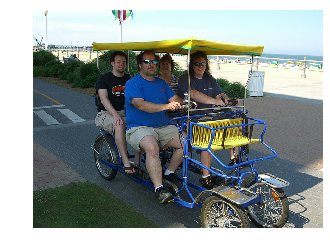

Caption: Are riding bikes on a street with a dog on the back of a bicycle and a car in the middle of the marketplace on a leash and a woman riding a bicycle in the street with a dog in the background on the back.


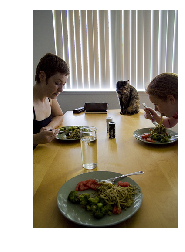

Caption: And vegetable sit on a kitchen counter top with a laptop and a pool of vegetables and a table with a bunch of food on it in front of them is eating from a pan and dish with a knife and a pool of them.


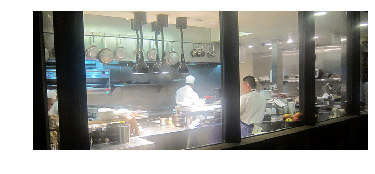

Caption: Are standing in a kitchen next to each other in a public restroom with a stove and a mirror in the background and a reflection of a reflection of a reflection of a reflection of a train in the mirror and a picture of a.


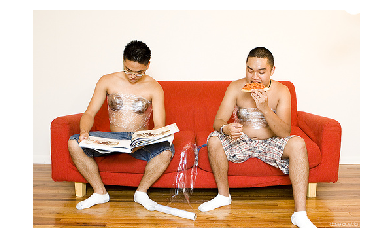

Caption: Sitting on a bench next to a body of water on a body of water from a body of water from a body of water in a body of water from a body of water in a body of water from a body of water.


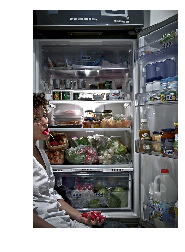

Caption: Steel industrial kitchen with a variety of pans on the grill and stainless steel appliances in the middle of a kitchen next to each other in a kitchen with white walls and white appliances and a metal oven with a bowl of fruit on it.


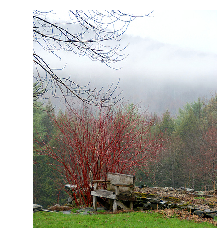

Caption: Surround a grassy area next to a forest of trees and trees in the park with trees in the background and a river in the background and a bench in the background of a grassy area in the background in the foreground and trees in.


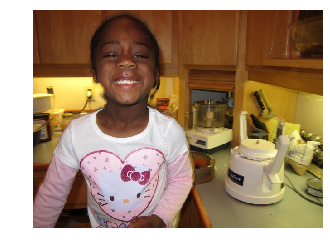

Caption: Preparing food in a kitchen next to each other in a kitchen next to a bottle of spoon and a spoon in a kitchen next to a spoon and a spoon in a kitchen next to a bottle of vegetables and a spoon in a.


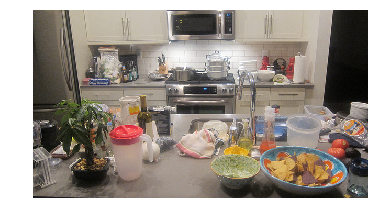

Caption: With pots and pans and pans on a counter top with a bunch of foods on the counter top and a lot of items on the counter top and there are many pots and pans on the counter top of a kitchen counter tops a.


In [14]:
from PIL import Image

beam_index=3

# generate captions
for img_path in os.listdir(test_dir):
    features = extract_img_features(cnn_model, cnn_model_input_size, test_dir + "/" + img_path)
    generated_caption = generate_captions(features, lstm_model, tokenizer, max_caption_len, beam_index=beam_index)
    caption = 'Caption: ' + generated_caption.split()[1].capitalize()
    for x in generated_caption.split()[2:len(generated_caption.split())-1]:
        caption = caption + ' ' + x
    caption += '.'
    # Show image and its caption
    I = Image.open(test_dir + "/" + img_path, 'r')
    plt.axis('off')
    plt.imshow(I)
    plt.savefig(test_dir + '_output/' + img_path)
    plt.show()
    print(caption)
    